<a href="https://colab.research.google.com/github/Skafind007/ActListasCir/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFORMACION DEL DATAFRAME
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   the_geom    10000 non-null  object
 1   municipio   10000 non-null  object
 2   departamen  10000 non-null  object
 3   cod_depart  10000 non-null  object
 4   cod_dane_m  10000 non-null  object
 5   gridcode    10000 non-null  object
 6   aptitud     10000 non-null  object
 7   area_ha     10000 non-null  object
 8   consecutiv  10000 non-null  object
dtypes: object(9)
memory usage: 703.2+ KB
None
ESTADISTICAS DEL DATA FRAME
                                                 the_geom  municipio  \
count                                               10000      10000   
unique                                              10000        645   
top     {'type': 'MultiPolygon', 'coordinates': [[[[-6...  Arauquita   
freq                                                    1       

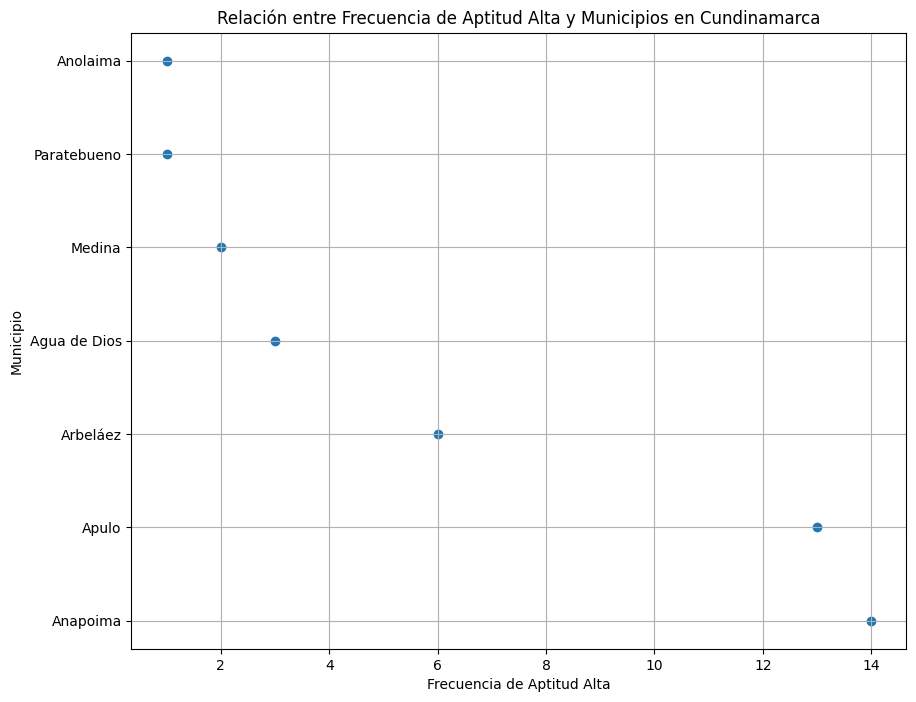

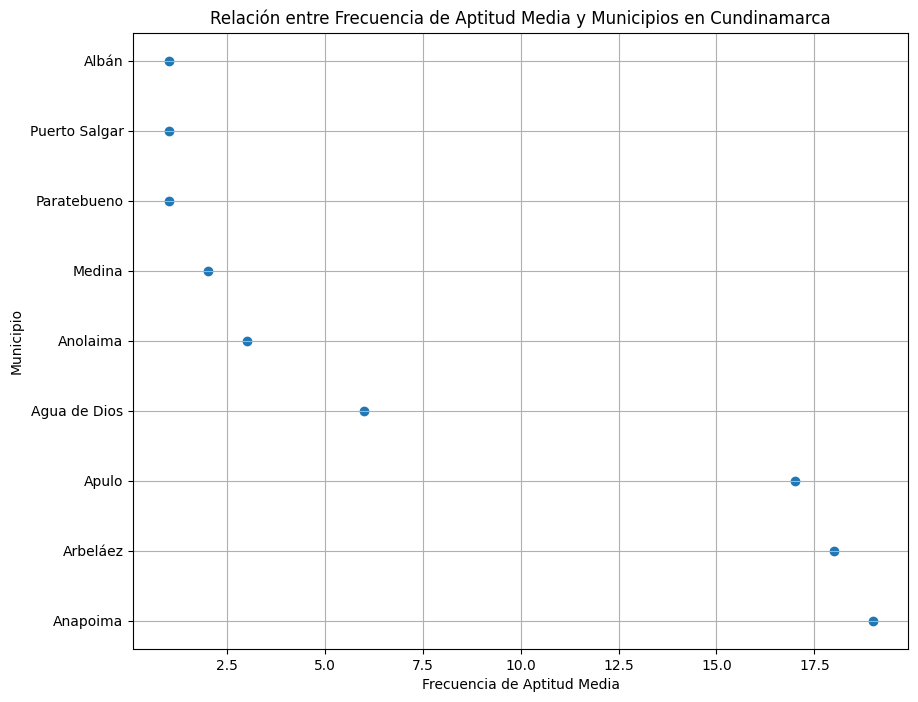

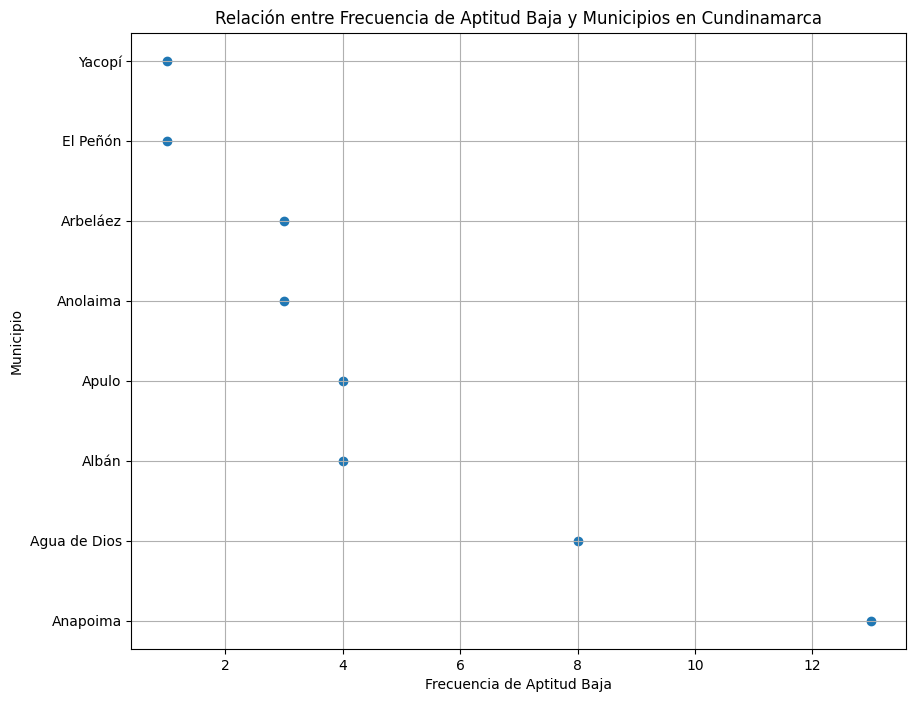

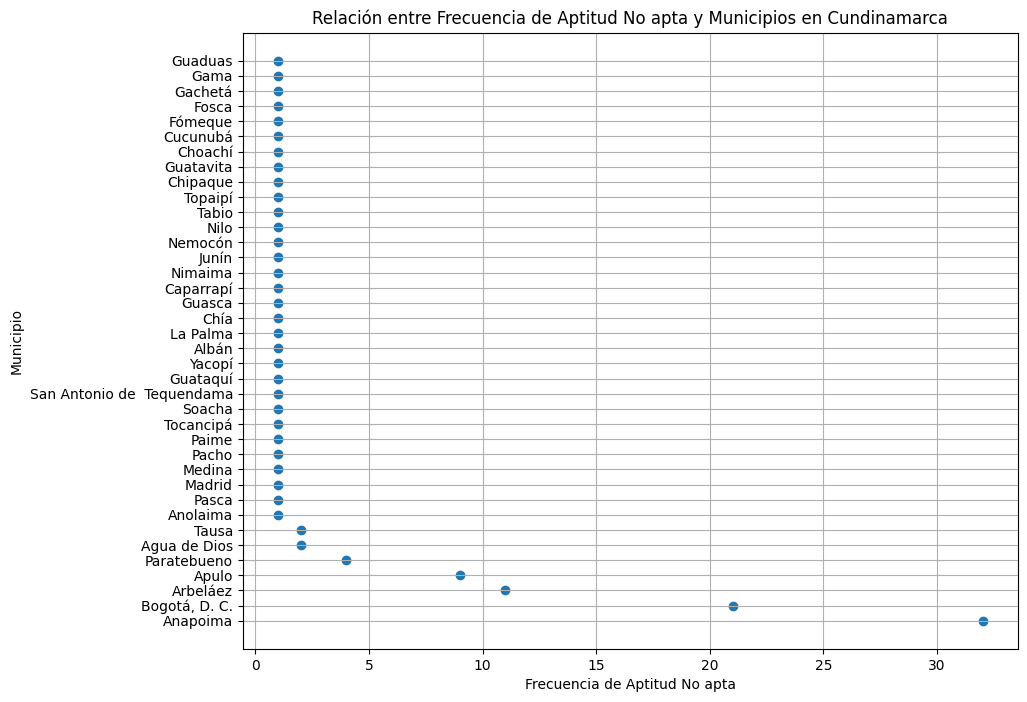

In [6]:
!pip install sodapy
import pandas as pd
import numpy as np
from sodapy import Socrata
import folium
import seaborn as sns
import matplotlib.pyplot as plt
cliente = Socrata("www.datos.gov.co", None)
identificador_conjunto_datos = "a5yc-uszt"
limite = 10000
resultados = cliente.get(identificador_conjunto_datos, limit=limite)
df = pd.DataFrame.from_records(resultados)




# Eliminar filas con valores nulos
df = df.dropna(axis=0, how="any")
# Imprimir información sobre el DataFrame (número de filas, columnas y tipos de datos)
print("INFORMACION DEL DATAFRAME")
print(df.info())
# Imprimir estadísticas descriptivas del DataFrame
print("ESTADISTICAS DEL DATA FRAME")
print(df.describe())
# Imprimir las primeras filas del DataFrame
print("PRIMERAS FILAS DATAFRAME")
print(df.head())
# Imprimir los nombres de las columnas del DataFrame
print("COLUMNAS DATAFRAME")
print(df.columns)
# Contar la frecuencia de cada categoría de aptitud
contador_aptitud = df['aptitud'].value_counts()
df_cundinamarca = df.loc[df['departamen'] == 'Cundinamarca']
print(df_cundinamarca)






#GRAFICO CUNDINAMARCA ALTA
# Filtrar el DataFrame por la aptitud alta
df_cundinamarca_alta = df_cundinamarca[df_cundinamarca['aptitud'] == 'Aptitud alta']
# Contar la frecuencia de la aptitud alta por municipio
contador_aptitud_alta = df_cundinamarca_alta['municipio'].value_counts()
# Obtener las coordenadas x y y para el gráfico de dispersión
municipios = contador_aptitud_alta.index
frecuencia_aptitud_alta = contador_aptitud_alta.values
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(frecuencia_aptitud_alta, municipios)
plt.title('Relación entre Frecuencia de Aptitud Alta y Municipios en Cundinamarca')
plt.xlabel('Frecuencia de Aptitud Alta')
plt.ylabel('Municipio')
# Mostrar el gráfico
plt.grid(True)
plt.show()


#GRAFICO CUNDINAMARCA Media
df_cundinamarca_media = df_cundinamarca[df_cundinamarca['aptitud'] == 'Aptitud media']
# Contar la frecuencia de la aptitud alta por municipio
contador_aptitud_media = df_cundinamarca_media['municipio'].value_counts()
# Obtener las coordenadas x y y para el gráfico de dispersión
municipios = contador_aptitud_media.index
frecuencia_aptitud_media = contador_aptitud_media.values
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(frecuencia_aptitud_media, municipios)
# Agregar título y etiquetas a los ejes
plt.title('Relación entre Frecuencia de Aptitud Media y Municipios en Cundinamarca')
plt.xlabel('Frecuencia de Aptitud Media')
plt.ylabel('Municipio')
# Mostrar el gráfico
plt.grid(True)
plt.show()



#GRAFICO CUNDINAMARCA BAJA
df_cundinamarca_baja = df_cundinamarca[df_cundinamarca['aptitud'] == 'Aptitud baja']
# Contar la frecuencia de la aptitud alta por municipio
contador_aptitud_baja = df_cundinamarca_baja['municipio'].value_counts()
# Obtener las coordenadas x y y para el gráfico de dispersión
municipios = contador_aptitud_baja.index
frecuencia_aptitud_baja = contador_aptitud_baja.values
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(frecuencia_aptitud_baja, municipios)
# Agregar título y etiquetas a los ejes
plt.title('Relación entre Frecuencia de Aptitud Baja y Municipios en Cundinamarca')
plt.xlabel('Frecuencia de Aptitud Baja')
plt.ylabel('Municipio')
# Mostrar el gráfico
plt.grid(True)
plt.show()


#GRAFICO CUNDINAMARCA NO APATA
df_cundinamarca_no_apta = df_cundinamarca[df_cundinamarca['aptitud'] == 'No apta']
# Contar la frecuencia de la aptitud alta por municipio
contador_aptitud_no_apta = df_cundinamarca_no_apta['municipio'].value_counts()
# Obtener las coordenadas x y y para el gráfico de dispersión
municipios = contador_aptitud_no_apta.index
frecuencia_aptitud_no_apta = contador_aptitud_no_apta.values
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(frecuencia_aptitud_no_apta, municipios)
# Agregar título y etiquetas a los ejes
plt.title('Relación entre Frecuencia de Aptitud No apta y Municipios en Cundinamarca')
plt.xlabel('Frecuencia de Aptitud No apta')
plt.ylabel('Municipio')
# Mostrar el gráfico
plt.grid(True)
plt.show()



# Crear un mapa centrado en Cundinamarca
mapa_cundinamarca = folium.Map(location=[4.598889, -74.080833], zoom_start=9)

# Agregar marcadores para cada registro con "aptitud" alta
for index, row in df_cundinamarca_alta.iterrows():
    folium.Marker(location=[row['the_geom']['coordinates'][0][0][0][1], row['the_geom']['coordinates'][0][0][0][0]], popup=row['municipio']).add_to(mapa_cundinamarca)

# Mostrar el mapa
mapa_cundinamarca




